In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [2]:
# defining file path

path  = r'C:\Users\Layzr\Desktop\School\Data Immersion Part 6\Achievement 6'

In [3]:
# importing dataset

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_dataset.csv'))

In [4]:
df.shape

(1999, 36)

In [5]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [6]:
# dropping unneeded column

df = df.drop('Unnamed: 0', axis=1)

In [7]:
df['awards'] = df['awards'].fillna('None')

In [8]:
df.columns

Index(['year', 'player', 'age', 'team', 'lg', 'war', 'g', 'pa', 'ab', 'r', 'h',
       '2b', '3b', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ba', 'obp', 'slg',
       'ops', 'ops+', 'roba', 'rbat+', 'tb', 'gidp', 'hbp', 'sh', 'sf', 'ibb',
       'pos', 'awards', 'player-additional'],
      dtype='object')

In [9]:
df = df.dropna()

In [10]:
df.shape

(1994, 35)

In [11]:
# choosing a single year to run the KMeans test on

df = df[df['year'] == 2024]

In [12]:
# data cleaning

df_scaled = df.drop(columns=['year', 'player', 'team', 'lg', 'pos', 'awards', 'player-additional'])

In [13]:
df_scaled.head()

,age,war,g,pa,ab,r,h,2b,3b,hr,...,ops,ops+,roba,rbat+,tb,gidp,hbp,sh,sf,ibb
2,27,8.7,160,735,671,111,191,48,14,21,...,0.834,131,0.373,134,330,6,6,1,3,1
3,29,9.2,159,731,636,134,197,38,7,54,...,1.036,187,0.449,190,411,7,6,0,5,10
10,23,9.1,159,719,630,118,177,31,7,37,...,0.893,156,0.385,157,333,2,7,0,4,1
12,33,4.1,159,718,650,101,154,27,2,23,...,0.699,102,0.310,100,254,9,3,0,1,2
15,25,7.9,157,713,576,128,166,31,4,41,...,0.989,179,0.424,179,328,10,4,0,4,2


In [14]:
df_scaled.shape

(649, 28)

In [15]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
scaled_array = scaler.fit_transform(df_scaled)

In [17]:
df_scaled = pd.DataFrame(scaled_array, columns=df_scaled.columns)

In [18]:
df_scaled.head()

,age,war,g,pa,ab,r,h,2b,3b,hr,...,ops,ops+,roba,rbat+,tb,gidp,hbp,sh,sf,ibb
0,-0.199831,4.529856,1.589822,2.098137,2.164560,2.722296,2.516199,3.395930,7.407044,1.359093,...,1.013355,0.962447,1.113867,0.990153,2.596368,0.211424,0.765480,0.211310,0.492381,0.112841
1,0.352043,4.820639,1.570430,2.079647,1.983658,3.523853,2.632654,2.453302,3.395815,4.919232,...,2.081152,2.040289,2.121744,2.014523,3.513487,0.417143,0.765480,-0.484834,1.424030,4.820726
2,-1.303579,4.762482,1.570430,2.024175,1.952647,2.966248,2.244470,1.793462,3.395815,3.085221,...,1.325236,1.443627,1.273006,1.410876,2.630335,-0.611450,1.030579,-0.484834,0.958205,0.112841
3,1.455791,1.854650,1.570430,2.019552,2.056019,2.373793,1.798058,1.416411,0.530651,1.574859,...,0.299729,0.404279,0.278390,0.368214,1.735861,0.828580,-0.029819,-0.484834,-0.439267,0.635939
4,-0.751705,4.064603,1.531646,1.996438,1.673541,3.314751,2.030968,1.793462,1.676717,3.516753,...,1.832704,1.886311,1.790206,1.813307,2.573723,1.034298,0.235281,-0.484834,0.958205,0.635939


In [19]:
# Defining the range of potential clusters in the data.

num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [20]:
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

[-18172.0,
 -10897.547665033959,
 -9020.025200830281,
 -7881.026235853351,
 -7348.1948773121285,
 -6837.557434620121,
 -6257.3848049946455,
 -5983.393044655809,
 -5711.144390461894]

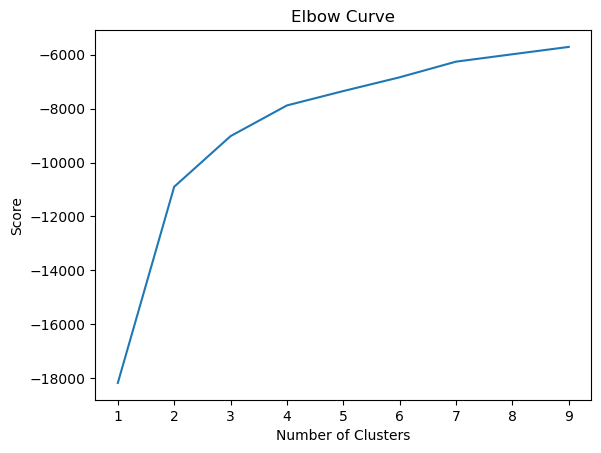

In [21]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### I'll be using 4 clusters as that's where the line starts to level out

In [22]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4)

In [23]:
# Fit the k-means object to the data.

kmeans.fit(df_scaled)

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=4)

In [24]:
# adding the clusters column to my dataframe

df_scaled['clusters'] = kmeans.fit_predict(df_scaled)

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [25]:
df_scaled.head(5)

,age,war,g,pa,ab,r,h,2b,3b,hr,...,ops+,roba,rbat+,tb,gidp,hbp,sh,sf,ibb,clusters
0,-0.199831,4.529856,1.589822,2.098137,2.164560,2.722296,2.516199,3.395930,7.407044,1.359093,...,0.962447,1.113867,0.990153,2.596368,0.211424,0.765480,0.211310,0.492381,0.112841,2
1,0.352043,4.820639,1.570430,2.079647,1.983658,3.523853,2.632654,2.453302,3.395815,4.919232,...,2.040289,2.121744,2.014523,3.513487,0.417143,0.765480,-0.484834,1.424030,4.820726,2
2,-1.303579,4.762482,1.570430,2.024175,1.952647,2.966248,2.244470,1.793462,3.395815,3.085221,...,1.443627,1.273006,1.410876,2.630335,-0.611450,1.030579,-0.484834,0.958205,0.112841,2
3,1.455791,1.854650,1.570430,2.019552,2.056019,2.373793,1.798058,1.416411,0.530651,1.574859,...,0.404279,0.278390,0.368214,1.735861,0.828580,-0.029819,-0.484834,-0.439267,0.635939,2
4,-0.751705,4.064603,1.531646,1.996438,1.673541,3.314751,2.030968,1.793462,1.676717,3.516753,...,1.886311,1.790206,1.813307,2.573723,1.034298,0.235281,-0.484834,0.958205,0.635939,2


In [26]:
df_scaled['clusters'].value_counts()

clusters
1    226
0    197
2    152
3     74
Name: count, dtype: int64

In [27]:
df = df.reset_index(drop=True)

In [27]:
df['awards'] = df['awards'].fillna('None')

In [29]:
df.shape

(649, 35)

In [30]:
df_scaled.shape

(649, 29)

In [31]:
df['clusters'] = df_scaled['clusters']

In [32]:
df_scaled.head()

,age,war,g,pa,ab,r,h,2b,3b,hr,...,ops+,roba,rbat+,tb,gidp,hbp,sh,sf,ibb,clusters
0,-0.199831,4.529856,1.589822,2.098137,2.164560,2.722296,2.516199,3.395930,7.407044,1.359093,...,0.962447,1.113867,0.990153,2.596368,0.211424,0.765480,0.211310,0.492381,0.112841,2
1,0.352043,4.820639,1.570430,2.079647,1.983658,3.523853,2.632654,2.453302,3.395815,4.919232,...,2.040289,2.121744,2.014523,3.513487,0.417143,0.765480,-0.484834,1.424030,4.820726,2
2,-1.303579,4.762482,1.570430,2.024175,1.952647,2.966248,2.244470,1.793462,3.395815,3.085221,...,1.443627,1.273006,1.410876,2.630335,-0.611450,1.030579,-0.484834,0.958205,0.112841,2
3,1.455791,1.854650,1.570430,2.019552,2.056019,2.373793,1.798058,1.416411,0.530651,1.574859,...,0.404279,0.278390,0.368214,1.735861,0.828580,-0.029819,-0.484834,-0.439267,0.635939,2
4,-0.751705,4.064603,1.531646,1.996438,1.673541,3.314751,2.030968,1.793462,1.676717,3.516753,...,1.886311,1.790206,1.813307,2.573723,1.034298,0.235281,-0.484834,0.958205,0.635939,2


In [33]:
df.head()

,year,player,age,team,lg,war,g,pa,ab,r,...,tb,gidp,hbp,sh,sf,ibb,pos,awards,player-additional,clusters
0,2024,Jarren Duran*,27,BOS,AL,8.7,160,735,671,111,...,330,6,6,1,3,1,*87,ASMVP-8,duranja01,2
1,2024,Shohei Ohtani*,29,LAD,NL,9.2,159,731,636,134,...,411,7,6,0,5,10,*D,ASMVP-1SS,ohtansh01,2
2,2024,Gunnar Henderson*,23,BAL,AL,9.1,159,719,630,118,...,333,2,7,0,4,1,*6/D,ASMVP-4,hendegu01,2
3,2024,Marcus Semien,33,TEX,AL,4.1,159,718,650,101,...,254,9,3,0,1,2,*4,AS,semiema01,2
4,2024,Juan Soto*,25,NYY,AL,7.9,157,713,576,128,...,328,10,4,0,4,2,*9/7DH,ASMVP-3SS,sotoju01,2


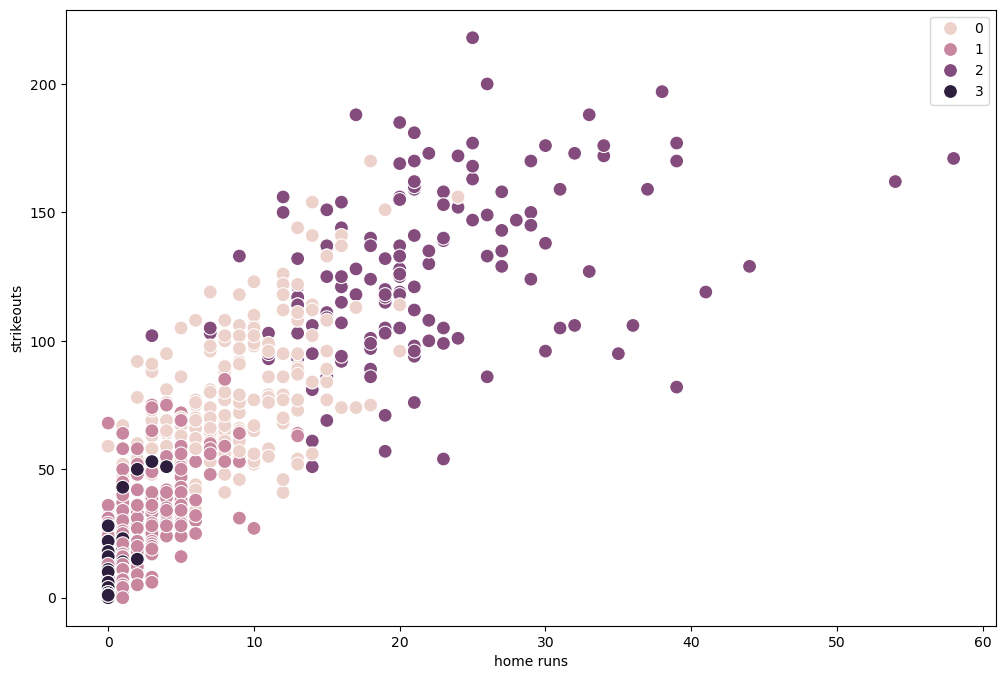

In [34]:
# creating visualizations of the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['hr'], y=df['so'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('home runs')
plt.ylabel('strikeouts')
plt.show()

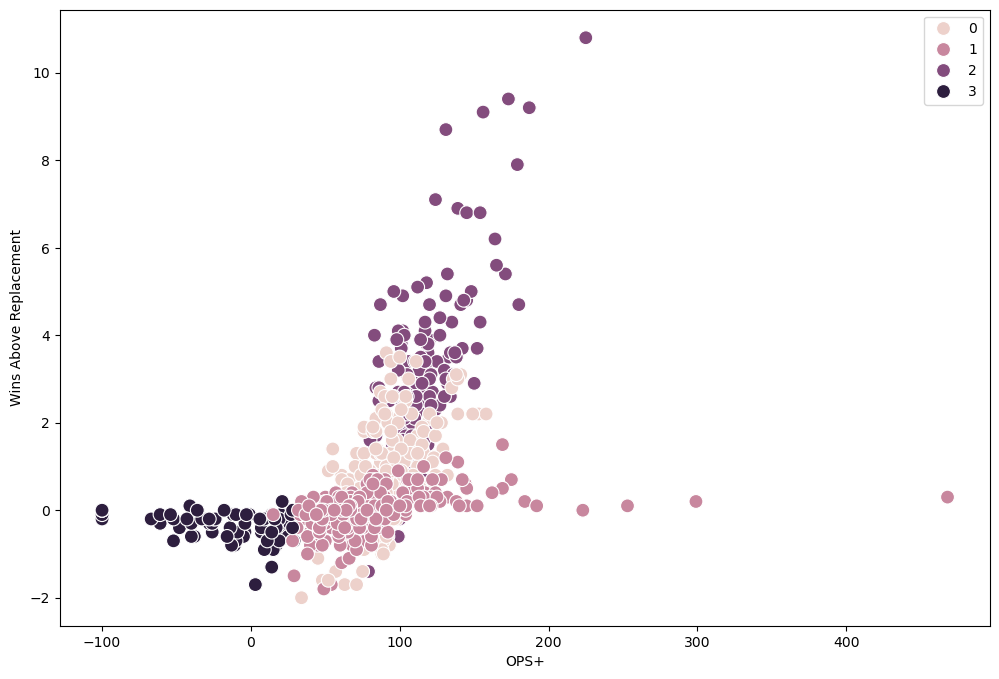

In [35]:
plt.figure(figsize=(12,8))
ops_war = sns.scatterplot(x=df['ops+'], y=df['war'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('OPS+') 
plt.ylabel('Wins Above Replacement') 
plt.show()

### Note for clarity the + in OPS+ is a stabilizer that accounts for a players offensive environment and adjusts it based on that putting everyone on an even playing field and for all + stats 100 is perfectly league average while say 78 would be 22% worse than league average while 132 would be 32% higher than league average

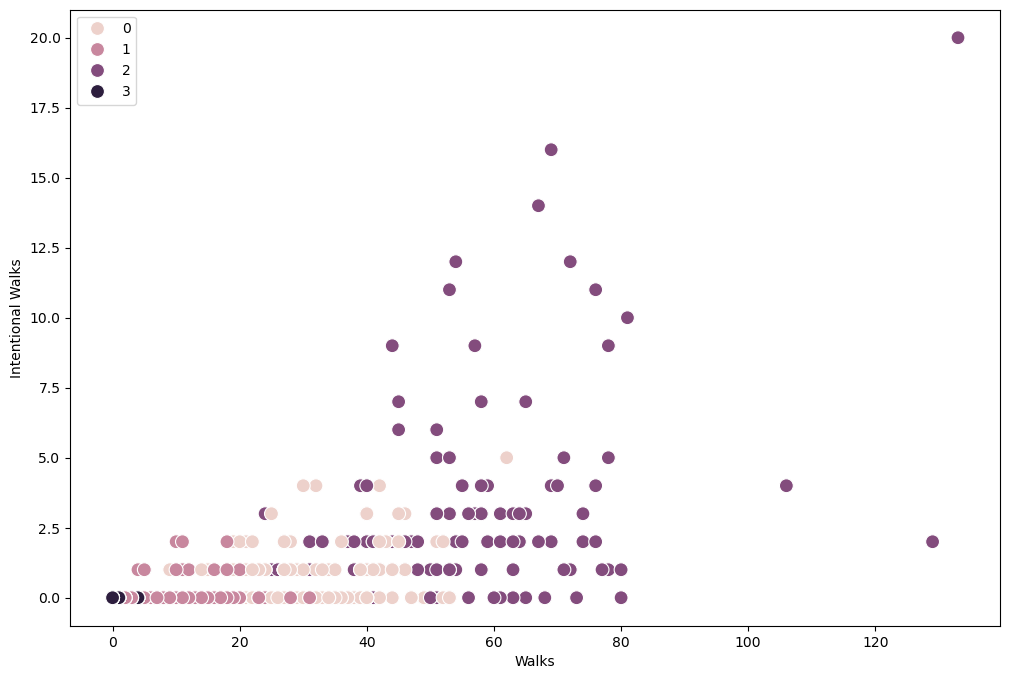

In [36]:
plt.figure(figsize=(12, 8))
sb_cs = sns.scatterplot(x=df['bb'], y=df['ibb'], hue=kmeans.labels_, s=100)

plt.grid(False)
plt.xlabel('Walks')
plt.ylabel('Intentional Walks')
plt.show()

## The clusters do make some sense it seems cluster 2 is the guys with the highest statistics in most categories followed by cluster 0 then cluster 1 and finally cluster 3 looks to be the guys with the lowest statistics

There is a ton of overlap between the clusters but mainly in the bottom 2 clusters

In [37]:
# changing max column display to accurately check all the descriptive statistics

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [38]:
df.groupby('clusters').describe()

year                                                         age  \
          count    mean  std     min     25%     50%     75%     max  count   
clusters                                                                      
0         197.0  2024.0  0.0  2024.0  2024.0  2024.0  2024.0  2024.0  197.0   
1         226.0  2024.0  0.0  2024.0  2024.0  2024.0  2024.0  2024.0  226.0   
2         152.0  2024.0  0.0  2024.0  2024.0  2024.0  2024.0  2024.0  152.0   
3          74.0  2024.0  0.0  2024.0  2024.0  2024.0  2024.0  2024.0   74.0   

                                                               war            \
               mean       std   min   25%   50%   75%   max  count      mean   
clusters                                                                       
0         28.629442  3.595596  21.0  26.0  28.0  31.0  37.0  197.0  0.779188   
1         26.761062  3.431292  20.0  24.0  26.0  29.0  40.0  226.0 -0.015044   
2         27.796053  3.527262  20.0  25.0  27.0  30.0  39.0  152.0  3.074342   
3         28.108108  3.844824  21.0  26.0  27.0  31.0  37.0   74.0 -0.354054   

                                                     g                         \
               std  min    25%   50%  75%   max  count        mean        std   
clusters                                                                        
0         1.138843 -2.0 -0.100  0.70  1.4   3.6  197.0  102.187817  21.694076   
1         0.460863 -1.8 -0.200  0.00  0.2   1.5  226.0   33.969027  21.266853   
2         1.963323 -1.4  1.875  2.80  3.9  10.8  152.0  142.703947  15.849808   
3         0.326957 -1.7 -0.600 -0.25 -0.1   0.2   74.0   15.324324  13.558709   

                                                 pa                         \
           min     25%    50%     75%    max  count        mean        std   
clusters                                                                     
0         49.0   87.00  100.0  120.00  151.0  197.0  347.548223  84.380540   
1          1.0   17.25   31.0   48.75  104.0  226.0   98.862832  66.430607   
2         78.0  135.00  148.0  154.00  162.0  152.0  584.980263  83.619880   
3          1.0    5.00   12.5   21.00   66.0   74.0   36.756757  36.463084   

                                                  ab                         \
            min     25%    50%     75%    max  count        mean        std   
clusters                                                                      
0         132.0  280.00  341.0  414.00  556.0  197.0  313.228426  78.342287   
1           3.0   43.50   88.5  155.75  265.0  226.0   89.097345  60.438761   
2         339.0  520.25  602.0  647.25  735.0  152.0  521.907895  75.467317   
3           1.0    9.25   26.5   57.50  155.0   74.0   33.959459  33.459212   

                                                  r                        \
            min    25%    50%     75%    max  count       mean        std   
clusters                                                                    
0         120.0  252.0  307.0  372.00  516.0  197.0  38.137056  10.535484   
1           3.0   39.0   80.5  137.75  238.0  226.0  10.048673   6.907794   
2         277.0  471.0  541.0  577.25  671.0  152.0  74.730263  17.130187   
3           1.0    9.0   23.5   51.00  139.0   74.0   2.702703   3.086558   

                                              h                               \
           min   25%   50%    75%    max  count        mean        std   min   
clusters                                                                       
0         16.0  30.0  39.0  46.00   66.0  197.0   74.436548  20.948730  31.0   
1          0.0   4.0   9.0  14.00   32.0  226.0   19.265487  13.069059   1.0   
2         49.0  62.0  72.0  83.25  134.0  152.0  134.763158  26.087153  74.0   
3          0.0   1.0   2.0   4.00   17.0   74.0    4.337838   5.010337   0.0   

                                          2b                                   \
            25%    50%     75%    max  count 

## Basically as said above cluster 2 is the highest stats, cluster 3 is the lowest stats, and clusters 1 and 0 is the middle ground. Obviously with so many statistics in my dataset when you graph some of them you will have a lot of overlap since the best players at some things aren't the best at other things.

#### These results could be very helpful in the future being able to run tests on what an algorithm believes to be the top 1/4 of the league or the bottom 1/4 of the league could be great for an analysis